In [12]:
import pandas as pd # import pandas library
df = pd.read_csv('whamm-vs-pin.csv', low_memory=False)
# whamm_df = pd.read_csv('all-results.csv', low_memory=False)

whamm_df = pd.read_csv('RERUN-opts_polybench.csv', low_memory=False)


In [13]:
df.head()

,suite,benchmark,BASE (jit),imix-whamm-engine-inline0-bind (s),imix-whamm-engine-inline0-transfer (s),imix-whamm-engine-inline0-instr (s),imix-whamm-engine-inline0-report (s),imix-whamm-rewrite-bind (s),imix-whamm-rewrite-transfer (s),imix-whamm-rewrite-instr (s),...,icount-whamm-engine-inline0-transfer (s),icount-whamm-engine-inline0-instr (s),icount-whamm-engine-inline0-report (s),icount-whamm-rewrite-bind (s),icount-whamm-rewrite-transfer (s),icount-whamm-rewrite-instr (s),icount-whamm-rewrite-report (s),icount-pin-bind (core),icount-pin-bind (tool),icount-pin-instr
0,polybench,2mm.wasm,0.046310,0.001861,0.085,0.573,0.000374,0,0,0.496517,...,0.085,0.604,0.000147,0,0,0.644606,0.000000,0.123316,0.114632,0.304122
1,polybench,3mm.wasm,0.070031,0.001897,0.108,0.958,0.000376,0,0,0.818754,...,0.108,1.067,0.000150,0,0,1.076181,0.000000,0.204270,0.053688,0.087436
2,polybench,adi.wasm,0.102490,0.001783,0.110,0.990,0.000395,0,0,0.895604,...,0.110,1.241,0.000150,0,0,1.448503,0.000000,0.127154,0.041485,0.150426
3,polybench,atax.wasm,0.013021,0.001764,0.051,0.034,0.000370,0,0,0.070252,...,0.051,0.033,0.000123,0,0,0.069627,0.000000,0.140170,0.025358,0.057656
4,polybench,bicg.wasm,0.013214,0.001744,0.054,0.030,0.000365,0,0,0.069623,...,0.054,0.028,0.000129,0,0,0.073680,0.000538,0.158451,0.020255,0.018706


In [14]:
whamm_df.head()

,Unnamed: 0,run_errored,config:run_mode,config:monitor,config:experiment,config:special,benchmark:suite,benchmark:name,run_time:mean,wiz_metrics_main:time_us,wiz_metrics_whamm:bind_time_us,wiz_metrics_whamm:report_time_us,run_cmd,run_timed_out
0,14,False,jit-tramp-jit,branches,whamm_engine,NaN,polybench,bicg.wasm,0.136279,49262.0,1540.6,23304.6,/home/evgilber/git/papers/oopsla2025-whamm/eva...,NaN
1,15,False,jit-tramp-jit,branches,whamm_engine,calc-bundle,polybench,bicg.wasm,0.133479,47193.4,1576.8,23059.0,/home/evgilber/git/papers/oopsla2025-whamm/eva...,NaN
2,36,False,jit-tramp-jit,branches,whamm_engine,NaN,polybench,symm.wasm,1.039680,944844.4,1588.4,23411.8,/home/evgilber/git/papers/oopsla2025-whamm/eva...,NaN
3,37,False,jit-tramp-jit,branches,whamm_engine,calc-bundle,polybench,symm.wasm,1.013434,916986.8,1648.4,24024.8,/home/evgilber/git/papers/oopsla2025-whamm/eva...,NaN
4,58,False,jit-tramp-jit,branches,whamm_engine,NaN,polybench,gramschmidt.wasm,1.235401,1138700.2,1632.4,23107.8,/home/evgilber/git/papers/oopsla2025-whamm/eva...,NaN


In [26]:
SUITE = 'polybench'
WHAMM_ENGINE = 'whamm_engine'

MODE = 'inline'
WIZ_BIND = 'wiz_metrics_whamm:bind_time_us'
WIZ_REPORT = 'wiz_metrics_whamm:report_time_us'
MEAN = 'run_time:mean'

SPEC_BUNDLE = 'calc-bundle'
SPEC_REPORT = 'calc-report'

# Baseline JIT data
baseline_polybench_jit_df = whamm_df[(whamm_df['config:run_mode'] == 'base_jit') & (whamm_df['benchmark:suite'] == SUITE)]
baseline_polybench_jit_df.head()

def whamm_engine_df(mon):
    # Monitor data, polybench data!
    monitor_polybench_df = whamm_df[(whamm_df['config:monitor'] == mon) & (whamm_df['benchmark:suite'] == SUITE)]
    
    new_df_rows = []
    for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
        baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
        assert len(baseline_data) == 1, "found multiple baselines for JIT!"
        base_jit = baseline_data[MEAN].values[0]
    
        # ENGINE
        # bind time: wiz_bind
        # report time: wiz_report
        # transfer time: mean_bundle - (mean_uninstr + wiz_report + wiz_bind)
        # instr time: mean - mean_bundle    # (mean_bundle includes wiz_report time)
        # CHECK TOTAL AT THE END!!
        
        engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        assert len(engine_data) == 22, f"found wrong number of results, expected 22: {len(engine_data)}"

        mean = engine_data[(engine_data['config:run_mode'] == MODE) & (engine_data['config:special'].isna())][MEAN].values[0]
        mean_bundle = engine_data[(engine_data['config:run_mode'] == MODE) & (engine_data['config:special'] == SPEC_BUNDLE)][MEAN].astype(float).values[0]
        
        bind_time_us = engine_data[(engine_data['config:run_mode'] == MODE) & (engine_data['config:special'].isna())][WIZ_BIND].astype(float).values[0]
        bind_time = bind_time_us / 1000000
        assert bind_time >= 0, f"bind_time is negative! {bind_time}"
        
        report_time_us = engine_data[(engine_data['config:run_mode'] == MODE) & (engine_data['config:special'].isna())][WIZ_REPORT].astype(float).values[0]
        report_time = report_time_us / 1000000
        assert report_time >= 0, f"report_time is negative! {report_time}"
        
        transfer_time = mean_bundle - (base_jit + bind_time + report_time)
        if transfer_time < 0:
            transfer_time = 0
    
        instr_time = mean - mean_bundle
        assert instr_time >= 0, f"instr_time is negative! {instr_time}"

        total = base_jit + (bind_time + report_time + transfer_time + instr_time)
        assert round(total, 3) == round(mean, 3), f"calculation not right, exp: {mean}, actual: {total}"
        
        new_df_rows.append({
            'suite': SUITE,
            'benchmark': benchmark_name,
            'time-jit': base_jit,
            # 'base-instr': mean,
            'bind': bind_time,       # microseconds -> seconds
            'transfer': transfer_time,
            'instr': instr_time,
            'report': report_time   # microseconds -> seconds
        })
    
    return pd.DataFrame(new_df_rows)
    
imix_engine_df = whamm_engine_df('imix')
imix_engine_df['base bind'] = 0

# imix_engine_df.head()

cache_engine_df = whamm_engine_df('cache-sim')
cache_engine_df['base bind'] = 0

# cache_engine_df.head()

icount_engine_df = whamm_engine_df('icount')
icount_engine_df['base bind'] = 0

icount_engine_df.head()

,suite,benchmark,time-jit,bind,transfer,instr,report,base bind
0,polybench,bicg.wasm,0.016068,0.001794,0.061350,0.034659,0.000148,0
1,polybench,symm.wasm,0.033400,0.001820,0.094924,0.436702,0.000152,0
2,polybench,gramschmidt.wasm,0.039974,0.001817,0.099615,0.692261,0.000141,0
3,polybench,floyd-warshall.wasm,0.371283,0.001391,0.426303,7.136797,0.000214,0
4,polybench,2mm.wasm,0.045685,0.001810,0.102157,0.694066,0.000138,0


In [27]:
WHAMM_REWRITE = 'whamm_rewrite'

def whamm_rewrite_df(mon, has_transfer):
    # Monitor data, polybench data!
    monitor_polybench_df = whamm_df[(whamm_df['config:monitor'] == mon) & (whamm_df['benchmark:suite'] == SUITE)]
    
    new_df_rows = []
    for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
        baseline_data = baseline_polybench_jit_df[baseline_polybench_jit_df['benchmark:name'] == benchmark_name]
        assert len(baseline_data) == 1, "found multiple baselines for JIT!"
        base_jit = baseline_data[MEAN].values[0]
    
        # REWRITING
        # bind time: 0
        # report time: mean - mean_report
        # transfer time: mean-bundle - (mean_uninstr + report_time)
        # instr time: mean - mean_bundle
        # CHECK TOTAL AT THE END!!
        
        rewrite_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_REWRITE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
        assert len(rewrite_data) == 6, f"found wrong number of results, expected 6: {len(rewrite_data)}"

        mean = rewrite_data[(rewrite_data['config:run_mode'] == 'jit-default') & (rewrite_data['config:special'].isna())][MEAN].values[0]
        mean_bundle = rewrite_data[(rewrite_data['config:run_mode'] == 'jit-default') & (rewrite_data['config:special'] == SPEC_BUNDLE)][MEAN].values[0]
        mean_report = rewrite_data[(rewrite_data['config:run_mode'] == 'jit-default') & (rewrite_data['config:special'] == SPEC_REPORT)][MEAN].values[0]
        
        report_time = mean - mean_report
        if report_time < 0:
            report_time = 0
        transfer_time = mean_bundle - (base_jit + report_time)
        if transfer_time < 0 or not has_transfer:
            transfer_time = 0
        instr_time = mean - mean_bundle
        if instr_time < 0:
            instr_time = 0
    
        if transfer_time == 0:
            instr_time = mean - (base_jit + report_time)

        total = base_jit + (report_time + transfer_time + instr_time)
        # print(f'{benchmark_name}: {total}')
        # print(f'    base: {base_jit}')
        # print(f'    report: {report_time}')
        # print(f'    transfer: {transfer_time}')
        # print(f'    instr: {instr_time}')
        assert round(total, 3) == round(mean, 3), f"calculation not right, exp: {mean}, actual: {total}"
        
        new_df_rows.append({
            'suite': SUITE,
            'benchmark': benchmark_name,
            'time-jit': base_jit,
            # 'base-instr': mean,
            'transfer': transfer_time,
            'instr': instr_time,
            'report': report_time   # microseconds -> seconds
        })
    
    return pd.DataFrame(new_df_rows)
    
imix_rewrite_df = whamm_rewrite_df('imix', False)
imix_rewrite_df['base bind'] = 0
imix_rewrite_df['bind'] = 0

# imix_rewrite_df.head()

cache_rewrite_df = whamm_rewrite_df('cache-sim', True)
cache_rewrite_df['base bind'] = 0
cache_rewrite_df['bind'] = 0

cache_rewrite_df.head()

icount_rewrite_df = whamm_rewrite_df('icount', False)
icount_rewrite_df['base bind'] = 0
icount_rewrite_df['bind'] = 0

icount_rewrite_df.head()

,suite,benchmark,time-jit,transfer,instr,report,base bind,bind
0,polybench,bicg.wasm,0.016068,0,0.081415,0.000890,0,0
1,polybench,symm.wasm,0.033400,0,0.427617,0.000000,0,0
2,polybench,gramschmidt.wasm,0.039974,0,0.694519,0.000000,0,0
3,polybench,floyd-warshall.wasm,0.371283,0,6.593854,0.005987,0,0
4,polybench,2mm.wasm,0.045685,0,0.687995,0.000256,0,0


In [28]:
# Some preliminary data setup

# IMIX

# imix_engine_df = df[['suite', 'benchmark', 'BASE (jit)', 'imix-whamm-engine-inline0-bind (s)', 'imix-whamm-engine-inline0-transfer (s)', 'imix-whamm-engine-inline0-instr (s)', 'imix-whamm-engine-inline0-report (s)']].copy()
# imix_engine_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# imix_engine_df['base bind'] = 0

# imix_rewrite_df = df[['suite', 'benchmark', 'BASE (jit)', 'imix-whamm-rewrite-bind (s)', 'imix-whamm-rewrite-transfer (s)', 'imix-whamm-rewrite-instr (s)', 'imix-whamm-rewrite-report (s)']].copy()
# imix_rewrite_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# imix_rewrite_df['base bind'] = 0

imix_pin_df = df[['suite', 'benchmark', 'BASE (jit)', 'imix-pin-bind (core)', 'imix-pin-bind (tool)', 'imix-pin-instr']].copy()
imix_pin_df.columns = ['suite', 'benchmark', 'time-jit', 'base bind', 'bind', 'instr']
imix_pin_df['transfer'] = 0
imix_pin_df['report'] = 0

# CACHE

# cache_engine_df = df[['suite', 'benchmark', 'BASE (jit)', 'cache-whamm-engine-inline0-bind (s)', 'cache-whamm-engine-inline0-transfer (s)', 'cache-whamm-engine-inline0-instr (s)', 'cache-whamm-engine-inline0-report (s)']].copy()
# cache_engine_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# cache_engine_df['base bind'] = 0

# cache_rewrite_df = df[['suite', 'benchmark', 'BASE (jit)', 'cache-whamm-rewrite-bind (s)', 'cache-whamm-rewrite-transfer (s)', 'cache-whamm-rewrite-instr (s)', 'cache-whamm-rewrite-report (s)']].copy()
# cache_rewrite_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# cache_rewrite_df['base bind'] = 0

cache_pin_df = df[['suite', 'benchmark', 'BASE (jit)', 'cache-pin-bind (core)', 'cache-pin-bind (tool)', 'cache-pin-instr']].copy()
cache_pin_df.columns = ['suite', 'benchmark', 'time-jit', 'base bind', 'bind', 'instr']
cache_pin_df['transfer'] = 0
cache_pin_df['report'] = 0

# ICOUNT

# icount_engine_df = df[['suite', 'benchmark', 'BASE (jit)', 'icount-whamm-engine-inline0-bind (s)', 'icount-whamm-engine-inline0-transfer (s)', 'icount-whamm-engine-inline0-instr (s)', 'icount-whamm-engine-inline0-report (s)']].copy()
# icount_engine_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# icount_engine_df['base bind'] = 0

# icount_rewrite_df = df[['suite', 'benchmark', 'BASE (jit)', 'icount-whamm-rewrite-bind (s)', 'icount-whamm-rewrite-transfer (s)', 'icount-whamm-rewrite-instr (s)', 'icount-whamm-rewrite-report (s)']].copy()
# icount_rewrite_df.columns = ['suite', 'benchmark', 'time-jit', 'bind', 'transfer', 'instr', 'report']
# icount_rewrite_df['base bind'] = 0

icount_pin_df = df[['suite', 'benchmark', 'BASE (jit)', 'icount-pin-bind (core)', 'icount-pin-bind (tool)', 'icount-pin-instr']].copy()
icount_pin_df.columns = ['suite', 'benchmark', 'time-jit', 'base bind', 'bind', 'instr']
icount_pin_df['transfer'] = 0
icount_pin_df['report'] = 0

icount_pin_df.head()

,suite,benchmark,time-jit,base bind,bind,instr,transfer,report
0,polybench,2mm.wasm,0.046310,0.123316,0.114632,0.304122,0,0
1,polybench,3mm.wasm,0.070031,0.204270,0.053688,0.087436,0,0
2,polybench,adi.wasm,0.102490,0.127154,0.041485,0.150426,0,0
3,polybench,atax.wasm,0.013021,0.140170,0.025358,0.057656,0,0
4,polybench,bicg.wasm,0.013214,0.158451,0.020255,0.018706,0,0


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_df(engine, rewrite, pin, ylim, mon_name, txt, include_title=False, include_ylabel=False, include_benchmarks=False):
    # Set the desired order of the stack parts (columns)
    ordered_columns = ['base bind', 'bind', 'transfer', 'report', 'instr']
    colors = ['cornflowerblue', 'royalblue', 'mediumseagreen', 'firebrick', 'sandybrown']

    # Create a figure and an axis
    if include_benchmarks:
        fig, ax = plt.subplots(figsize=(21, 5))
    else:
        fig, ax = plt.subplots(figsize=(21, 4))

    # Sort the DataFrame by 'time-jit' in increasing order
    engine_df_sorted = engine.sort_values('time-jit')
    # Reset the index to ensure the first entry is properly handled
    engine_df_sorted.reset_index(drop=True, inplace=True)
    
    rewrite_df_sorted = rewrite.sort_values('time-jit')
    # Reset the index to ensure the first entry is properly handled
    rewrite_df_sorted.reset_index(drop=True, inplace=True)
    
    pin_df_sorted = pin.sort_values('time-jit')
    # Reset the index to ensure the first entry is properly handled
    pin_df_sorted.reset_index(drop=True, inplace=True)

    # Plot each dataframe as a stacked bar chart
    engine_df_sorted[ordered_columns].plot(kind='bar', zorder=3, stacked=True, ax=ax, position=0, width=.25, color=colors, edgecolor='dimgrey', linewidth=.25)
    rewrite_df_sorted[ordered_columns].plot(kind='bar', zorder=3, stacked=True, ax=ax, position=1, width=.25, color=colors, edgecolor='dimgrey', linewidth=.25)
    pin_df_sorted[ordered_columns].plot(kind='bar', zorder=3, stacked=True, ax=ax, position=-1, width=.25, color=colors, edgecolor='dimgrey', linewidth=.25)

    # Combine the legends (same legend for both DataFrames)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ordered_columns, loc='upper left')

    # Setting y-axis to logarithmic scale (base 10)
    #ax.set_yscale('log')
    ax.set_ylim(0, ylim)

    # Add extra buffer at the end of the x-axis
    # Set x-axis limits to add extra space after the last bar
    ax.set_xlim(0.5, len(pin_df_sorted))  # Adjust the limits to create buffer space

    # Set custom x-axis labels
    if include_benchmarks:
        ax.set_xticklabels(engine_df_sorted['benchmark'], fontsize=12, rotation=45)  # Set the x-tick labels
        plt.xlabel('Benchmark', fontweight='bold', fontsize=17)
    else:    
        ax.set_xticklabels([]) 

    
    # Add labels for total values at the top of each stacked bar
    # Get current y-axis limits
    ymin, ymax = ax.get_ylim()
    # Add labels for total values at the top of each stacked bar, only for bars off the ylim
    
    for i, container in enumerate(ax.containers):
        curr_x = 0
        total_height = 0
        for bar in container:
            if curr_x == bar.get_x():
                # Calculate the total height of the stacked bar
                total_height = bar.get_height() + (bar.get_y() if bar.get_y() > 0 else 0)  # total height including y offset
            else:
                # we've moved to the next bar, add text first!
                if total_height > ymax:
                    # Only add label if the bar exceeds the current y-limits
                    # Place label above the y-axis limits
                    ax.text(curr_x + bar.get_width() - .18, ymax - .5,  # Position label just above ymax
                            f'{total_height:.1f}', ha='center', va='center', rotation=270, fontsize=10)# Add labels for total values at the top of each stacked bar, only for bars off the ylim
                curr_x = bar.get_x();
                total_height = bar.get_height() + (bar.get_y() if bar.get_y() > 0 else 0)
        
        if total_height > ymax:
            # Only add label if the bar exceeds the current y-limits
            # Place label above the y-axis limits
            ax.text(curr_x + bar.get_width() - .18, ymax - .5,  # Position label just above ymax
                    f'{total_height:.1f}', ha='center', va='center', rotation=270, fontsize=10)# Add labels for total values at the top of each stacked bar, only for bars off the ylim
            
    # for i, container in enumerate(ax.containers):
    #     for bar in container:
    #         # Calculate the total height of the stacked bar
    #         total_height = bar.get_height() + (bar.get_y() if bar.get_y() > 0 else 0)  # total height including y offset
            
    #         # Only add label if the bar exceeds the current y-limits
    #         if total_height > ymax:
    #             # Place label above the y-axis limits
    #             ax.text(bar.get_x() + bar.get_width() - .1, ymax - .3,  # Position label just above ymax
    #                     f'{total_height:.1f}', ha='center', va='center', rotation=90, fontsize=10)# Add labels for total values at the top of each stacked bar, only for bars off the ylim
    #             continue



    # Adding labels and title
    if include_benchmarks:
        fig.text(1.02, 0.6, f'{mon_name}', ha='right', va='center', fontsize=17, fontweight='bold', rotation=270)
    else:
        fig.text(1.02, 0.5, f'{mon_name}', ha='right', va='center', fontsize=17, fontweight='bold', rotation=270)
    if include_ylabel:
        fig.text(-0.02, 0.5, f'Absolute Overhead (seconds)', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    else:
        fig.text(-0.02, 0.5, f'   ', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    plt.grid(True, axis='y', zorder=0)
    # create second y axis label
    # ax1 = ax.twinx()
    # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
    if include_title:
        fig.text(0.5, 1.02, f'Whamm vs. Pin', ha='center', va='top', fontsize=20, fontweight='bold')
    # plt.title(f'Ω vs. Pin ({mon_name})')

    
    # Add a text box with min/max values to the upper-left corner
    ax.text(0.1, 0.93, txt, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))


    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    plt.savefig(f"plots/RERUN-whamm-vs-pin-{mon_name}.png", dpi=400, bbox_inches='tight')


In [30]:
def min_max(df):
    cols = ['base bind', 'bind', 'transfer', 'report', 'instr']
    row_sums = df[cols].sum(axis=1)

    return (row_sums.min(), row_sums.max())

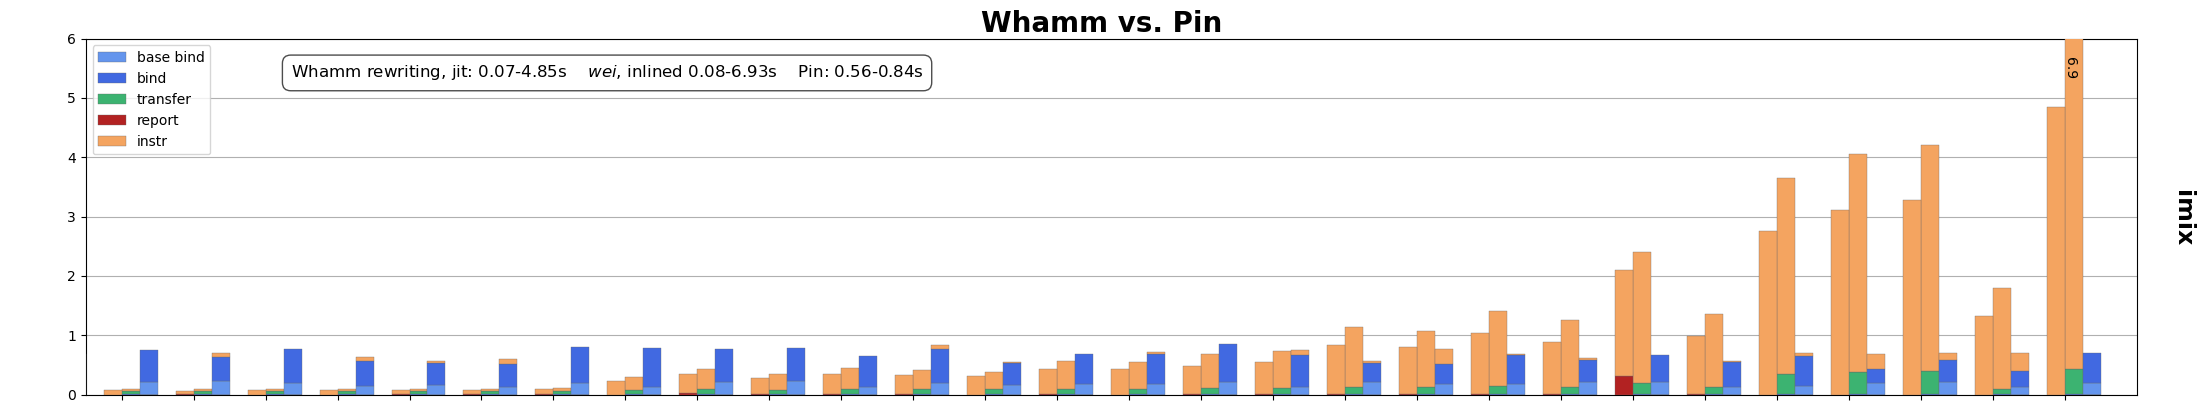

In [31]:
engine_minmax = min_max(imix_engine_df)
imix_engine_min = engine_minmax[0]
imix_engine_max = engine_minmax[1]
engine_str = f'$\\it{{wei}}$, inlined {imix_engine_min:.2f}-{imix_engine_max:.2f}s'

rewrite_minmax = min_max(imix_rewrite_df)
imix_rewrite_min = rewrite_minmax[0]
imix_rewrite_max = rewrite_minmax[1]
rewrite_str = 'Whamm rewriting, jit: ' + f'{imix_rewrite_min:.2f}-{imix_rewrite_max:.2f}s'


plot_df(imix_engine_df, imix_rewrite_df, imix_pin_df, 6, 'imix', f'{rewrite_str}    {engine_str}    Pin: 0.56-0.84s', include_title=True)

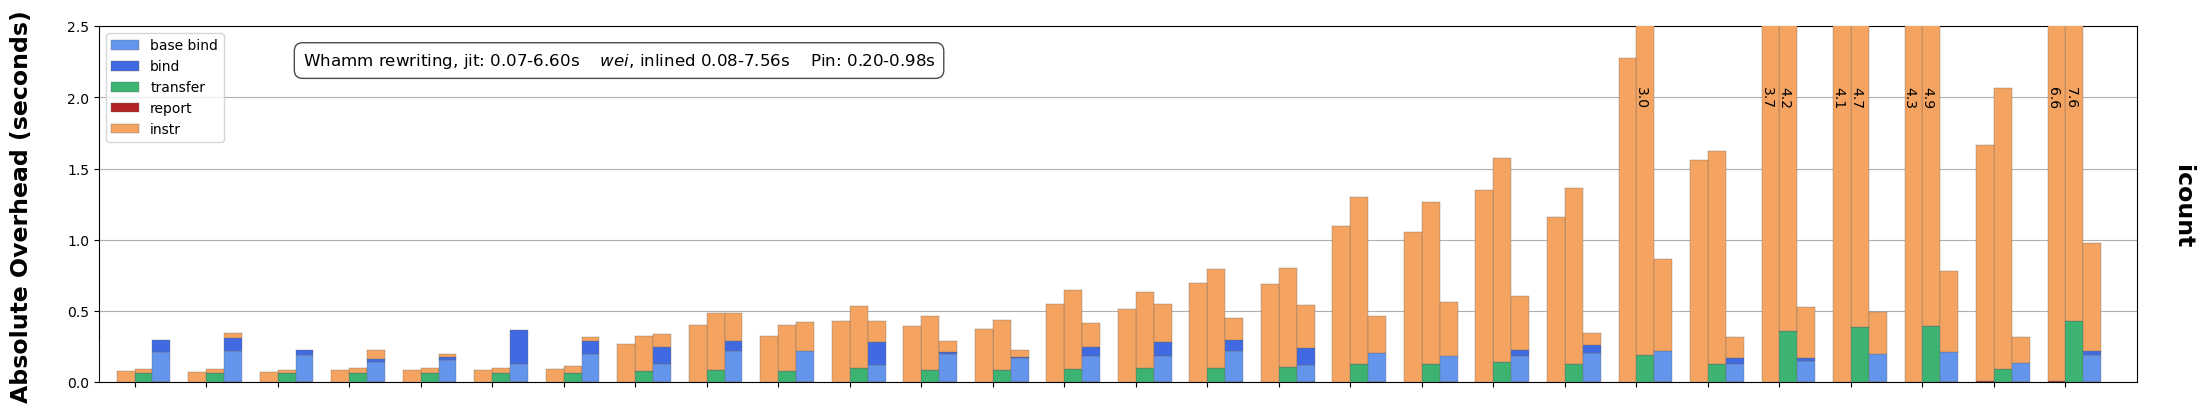

In [32]:
engine_minmax = min_max(icount_engine_df)
icount_engine_min = engine_minmax[0]
icount_engine_max = engine_minmax[1]
engine_str = f'$\\it{{wei}}$, inlined {icount_engine_min:.2f}-{icount_engine_max:.2f}s'

rewrite_minmax = min_max(icount_rewrite_df)
icount_rewrite_min = rewrite_minmax[0]
icount_rewrite_max = rewrite_minmax[1]
rewrite_str = 'Whamm rewriting, jit: ' + f'{icount_rewrite_min:.2f}-{icount_rewrite_max:.2f}s'

plot_df(icount_engine_df, icount_rewrite_df, icount_pin_df, 2.5, 'icount', f'{rewrite_str}    {engine_str}    Pin: 0.20-0.98s', include_ylabel=True)

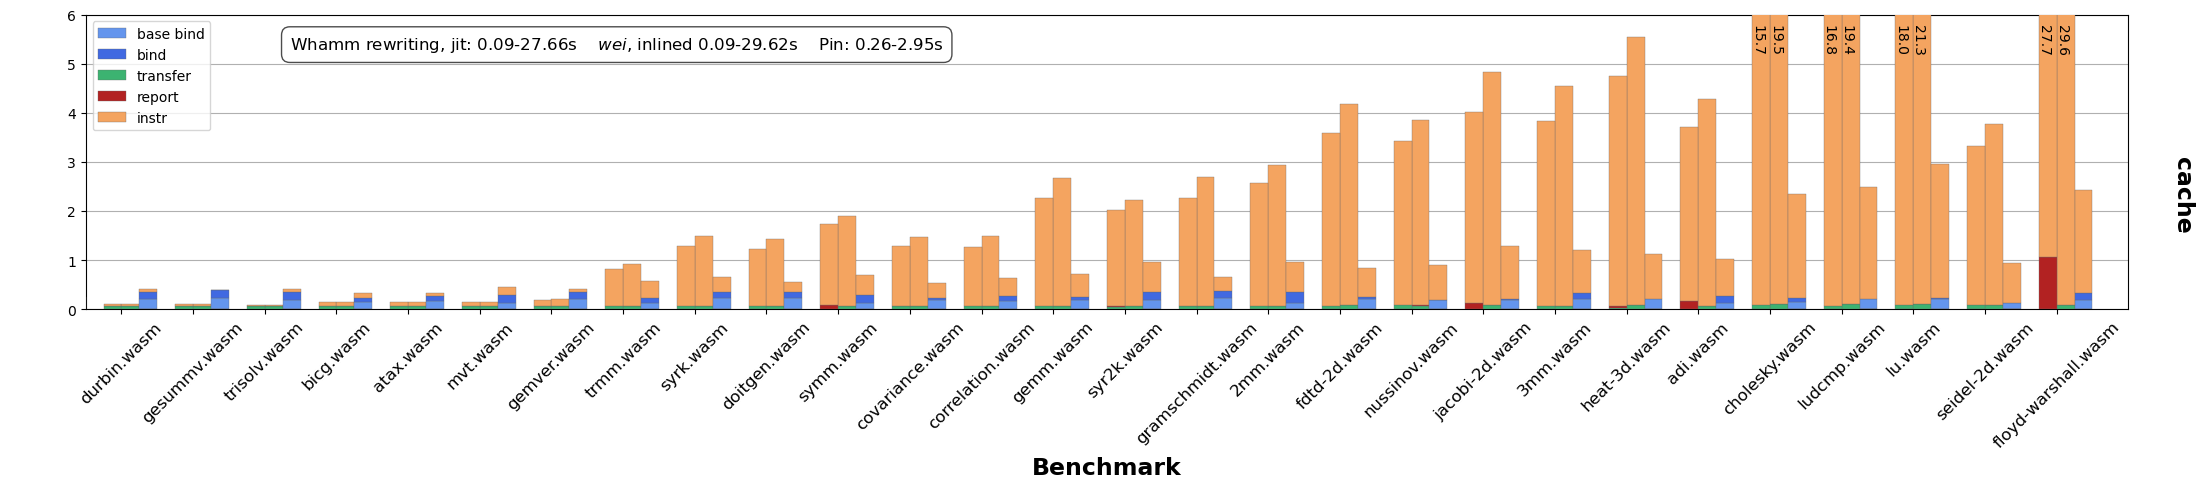

In [33]:
engine_minmax = min_max(cache_engine_df)
cache_engine_min = engine_minmax[0]
cache_engine_max = engine_minmax[1]
engine_str = f'$\\it{{wei}}$, inlined {cache_engine_min:.2f}-{cache_engine_max:.2f}s'

rewrite_minmax = min_max(cache_rewrite_df)
cache_rewrite_min = rewrite_minmax[0]
cache_rewrite_max = rewrite_minmax[1]
rewrite_str = 'Whamm rewriting, jit: ' + f'{cache_rewrite_min:.2f}-{cache_rewrite_max:.2f}s'

plot_df(cache_engine_df, cache_rewrite_df, cache_pin_df, 6, 'cache', f'{rewrite_str}    {engine_str}    Pin: 0.26-2.95s', include_benchmarks=True)